# Machine learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn import svm

## Clustering

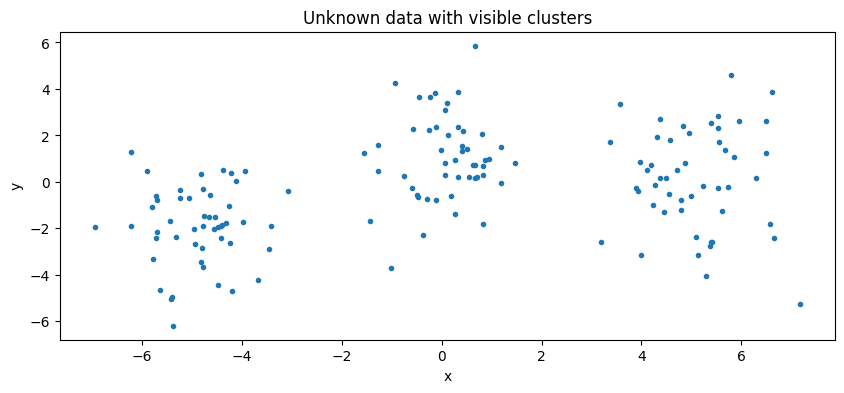

In [24]:
N = 50
x = np.random.normal([-5, 0, 5], [0.8, 0.7, 0.8], (N, 3)).flatten()
y = np.random.normal([-2, 1, 0], [2, 2, 2], (N, 3)).flatten()


plt.figure(figsize=(10, 4))
plt.plot(x, y, ".")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Unknown data with visible clusters")
plt.show()

C:\Users\matou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


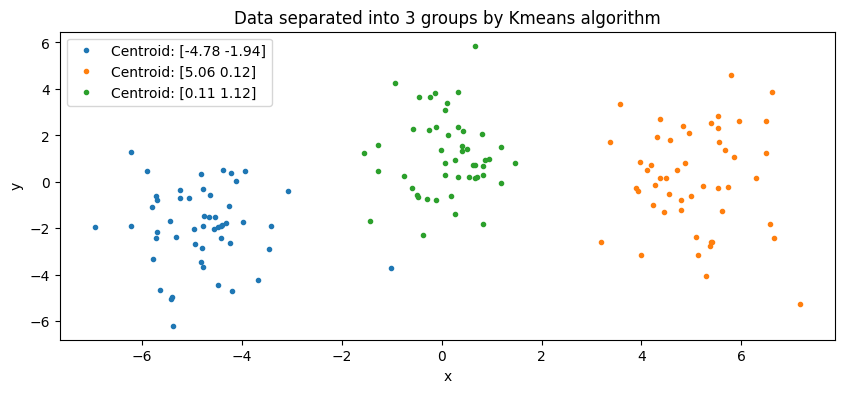

In [39]:
estimator = KMeans(n_clusters=3)
data = list(zip(x,y))
estimator.fit(data)

labels = estimator.predict(data)

plt.figure(figsize=(10, 4))
for l in np.unique(labels):
    plt.plot(x[np.where(labels == l)], y[np.where(labels == l)], ".", label=f"Centroid: {np.round(estimator.cluster_centers_[l], 2)}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data separated into 3 groups by Kmeans algorithm")
plt.legend()
plt.show()


C:\Users\matou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


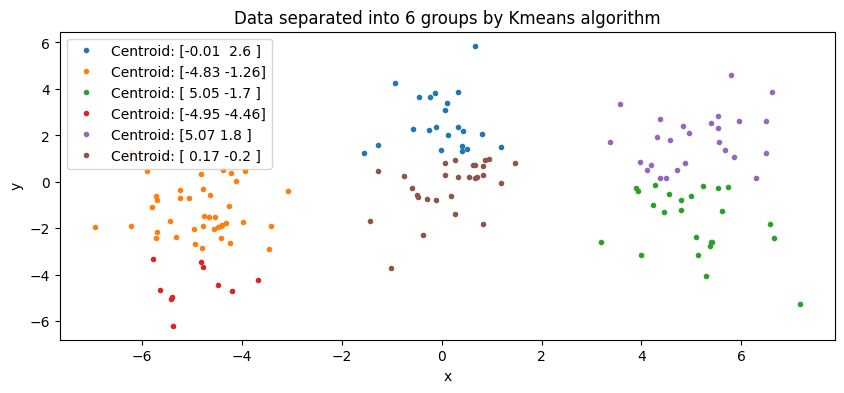

In [42]:
estimator = KMeans(n_clusters=6)
data = list(zip(x,y))
estimator.fit(data)

labels = estimator.predict(data)

plt.figure(figsize=(10, 4))
for l in np.unique(labels):
    plt.plot(x[np.where(labels == l)], y[np.where(labels == l)], ".", label=f"Centroid: {np.round(estimator.cluster_centers_[l], 2)}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data separated into 6 groups by Kmeans algorithm")
plt.legend()
plt.show()


## Classification

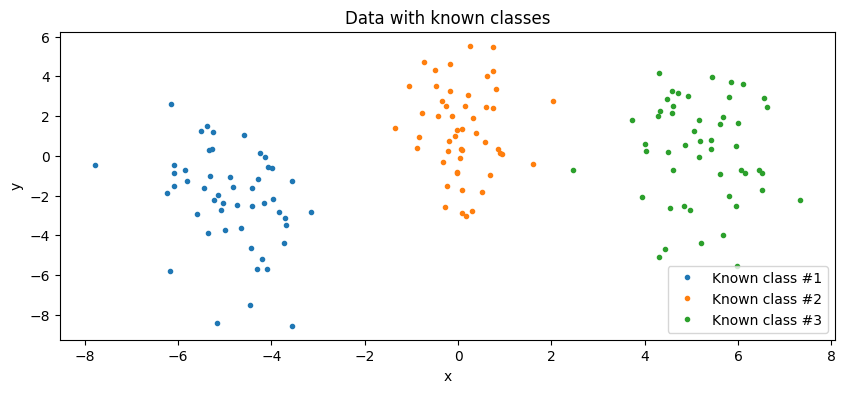

In [12]:
N = 50
x = np.random.normal([-5, 0, 5], [0.8, 0.7, 0.8], (N, 3)).T.flatten()
y = np.random.normal([-2, 1, 0], [2, 2, 2], (N, 3)).T.flatten()
data = np.array(list(zip(x,y)))
labels = np.repeat([1, 2, 3], N)

plt.figure(figsize=(10, 4))
for l in np.unique(labels):
    plt.plot(x[np.where(labels == l)], y[np.where(labels == l)], ".", label=f"Known class #{l}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with known classes")
plt.legend()
plt.show()

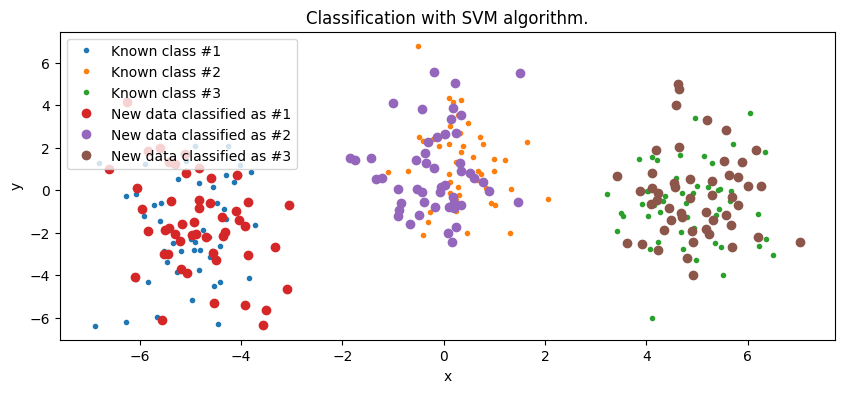

In [10]:
N = 50
x = np.random.normal([-5, 0, 5], [0.8, 0.7, 0.8], (N, 3)).T.flatten()
y = np.random.normal([-2, 1, 0], [2, 2, 2], (N, 3)).T.flatten()
data = np.array(list(zip(x,y)))
labels = np.repeat([1, 2, 3], N)

plt.figure(figsize=(10, 4))
for l in np.unique(labels):
    plt.plot(x[np.where(labels == l)], y[np.where(labels == l)], ".", label=f"Known class #{l}")


clf_svm = svm.SVC()
clf_svm.fit(data, labels)

x = np.random.normal([-5, 0, 5], [0.8, 0.7, 0.8], (N, 3)).T.flatten()
y = np.random.normal([-2, 1, 0], [2, 2, 2], (N, 3)).T.flatten()
data = np.array(list(zip(x,y)))
labels = clf_svm.predict(data)

for l in np.unique(labels):
    plt.plot(x[np.where(labels == l)], y[np.where(labels == l)], "o", label=f"New data classified as #{l}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Classification with SVM algorithm.")
plt.legend()
plt.show()

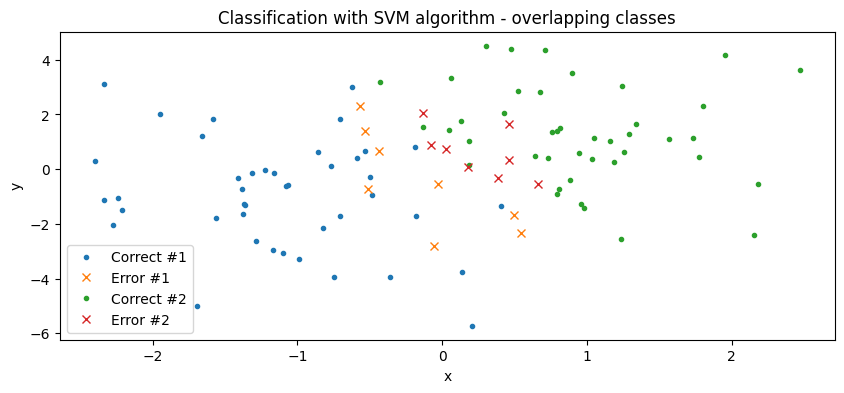

In [36]:
N = 50
x = np.random.normal([-1, 1], [0.8, 0.7], (N, 2)).T.flatten()
y = np.random.normal([-1, 1], [2, 2], (N, 2)).T.flatten()
data = np.array(list(zip(x,y)))
labels = np.repeat([1, 2], N)

plt.figure(figsize=(10, 4))
# for l in np.unique(labels):
#     plt.plot(x[np.where(labels == l)], y[np.where(labels == l)], ".", label=f"Known class #{l}")


clf_svm = svm.SVC()
clf_svm.fit(data, labels)

x = np.random.normal([-1, 1], [0.8, 0.7], (N, 2)).T.flatten()
y = np.random.normal([-1, 1], [2, 2], (N, 2)).T.flatten()
data = np.array(list(zip(x,y)))
truth = np.repeat([1, 2], N)
labels = clf_svm.predict(data)

colors = ["blue", "green"]

for l in np.unique(labels):
    true = np.where((labels == l) & (labels == truth))
    false = np.where((labels == l) & (labels != truth))
    plt.plot(x[true], y[true], ".", label=f"Correct #{l}")
    plt.plot(x[false], y[false], "x", label=f"Error #{l}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Classification with SVM algorithm - overlapping classes")
plt.legend()
plt.show()

# Classification threshold

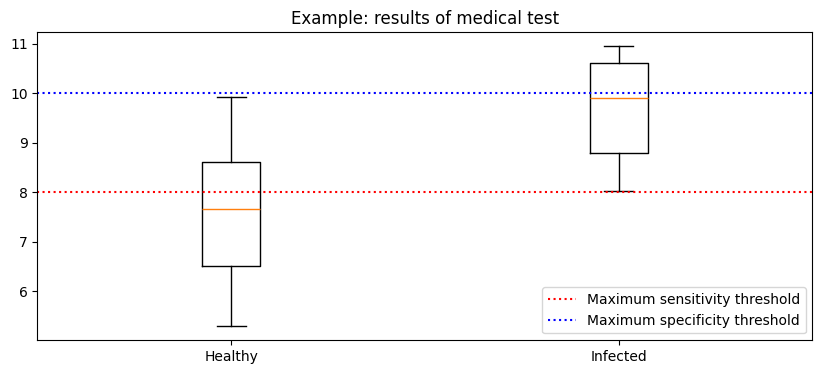

In [60]:
N = 50
x = np.random.uniform([5, 8], [10, 11], (N, 2))

plt.figure(figsize=(10, 4))
plt.boxplot(x)
plt.axhline(8, color="red", linestyle="dotted", label="Maximum sensitivity threshold")
plt.axhline(10, color="blue", linestyle="dotted", label="Maximum specificity threshold")
plt.title("Example: results of medical test")
plt.xticks([1, 2], ['Healthy', 'Infected'])
plt.legend(loc="lower right")
plt.show()

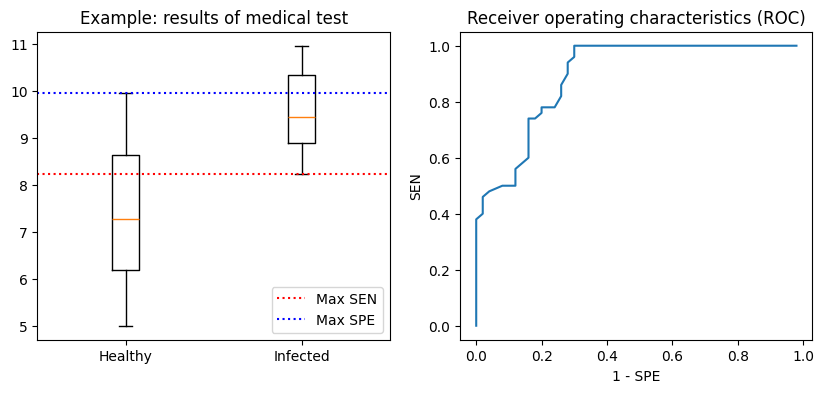

In [84]:
N = 50
x = np.random.uniform([5, 8], [10, 11], (N, 2))

spe = np.zeros(N * 2)
sen = np.zeros(N * 2)
for idx, th in enumerate(np.linspace(x.min(), x.max(), N * 2)):
    tp = np.count_nonzero(x[:,1] > th)
    tn = np.count_nonzero(x[:,0] <= th)
    sen[idx] = tp / N
    spe[idx] = tn / N

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(x)
plt.axhline(x[:,1].min(), color="red", linestyle="dotted", label="Max SEN")
plt.axhline(x[:,0].max(), color="blue", linestyle="dotted", label="Max SPE")
plt.title("Example: results of medical test")
plt.xticks([1, 2], ['Healthy', 'Infected'])
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(1 - spe, sen)
plt.title("Receiver operating characteristics (ROC)")
plt.xlabel("1 - SPE")
plt.ylabel("SEN")
plt.show()